In [55]:
!python gen_imgs.py

In [56]:
from IPython.display import Image

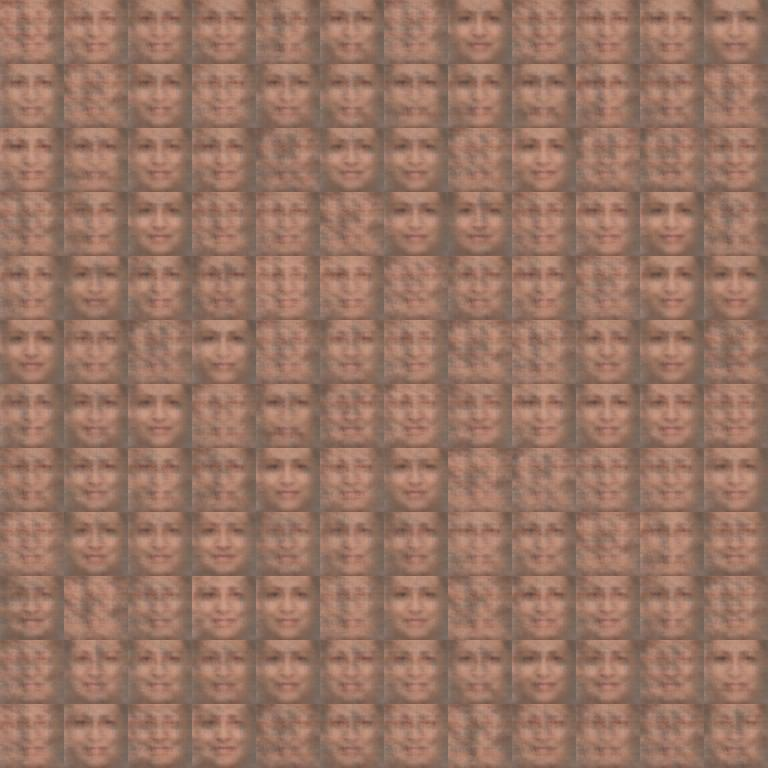

In [57]:
Image(filename='output/demo.jpeg')

In [35]:
import torch

In [43]:
a = torch.zeros(128)

In [44]:
a

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
a.reshape((2, 8, 8))

tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [3]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc21 = nn.Linear(nz, nz)
        self.fc22 = nn.Linear(nz, nz)
        
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz,ngf * 4, 4, 1, 0, bias=True),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=True),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=True),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=True),
            nn.Sigmoid()
        )

In [4]:
class UpsampleBlock(nn.Module):
    def __init__(self, in_channel, out_channel):
        super().__init__()

        self._seq = nn.Sequential(

            nn.ConvTranspose2d(in_channel,
                               out_channel,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            # nn.UpsamplingBilinear2d(scale_factor=2),
            # nn.Conv2d(in_channel, out_channel, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channel), Swish(),
        )

    def forward(self, x):
        return self._seq(x)

In [20]:
import torch
layer = nn.ConvTranspose2d(48,
                           32 * 4,
                           kernel_size=4,
                           stride=1,
                           padding=0,
                           bias=True)
layer1 = nn.Linear(48, 48)

In [21]:
result = torch.zeros((1, 48, 1, 1))
layer(result)

tensor([[[[-0.0114, -0.0114, -0.0114, -0.0114],
          [-0.0114, -0.0114, -0.0114, -0.0114],
          [-0.0114, -0.0114, -0.0114, -0.0114],
          [-0.0114, -0.0114, -0.0114, -0.0114]],

         [[ 0.0150,  0.0150,  0.0150,  0.0150],
          [ 0.0150,  0.0150,  0.0150,  0.0150],
          [ 0.0150,  0.0150,  0.0150,  0.0150],
          [ 0.0150,  0.0150,  0.0150,  0.0150]],

         [[ 0.0024,  0.0024,  0.0024,  0.0024],
          [ 0.0024,  0.0024,  0.0024,  0.0024],
          [ 0.0024,  0.0024,  0.0024,  0.0024],
          [ 0.0024,  0.0024,  0.0024,  0.0024]],

         ...,

         [[-0.0063, -0.0063, -0.0063, -0.0063],
          [-0.0063, -0.0063, -0.0063, -0.0063],
          [-0.0063, -0.0063, -0.0063, -0.0063],
          [-0.0063, -0.0063, -0.0063, -0.0063]],

         [[ 0.0071,  0.0071,  0.0071,  0.0071],
          [ 0.0071,  0.0071,  0.0071,  0.0071],
          [ 0.0071,  0.0071,  0.0071,  0.0071],
          [ 0.0071,  0.0071,  0.0071,  0.0071]],

         [[-0.0

In [14]:
std = result.mul(0.5).exp_()

In [15]:
std.data.new(std.size()).normal_()

tensor([ 1.2754, -1.1387, -0.9564,  2.0451, -0.2889,  1.9320,  0.1725, -0.9890,
         0.4327, -0.5396,  0.4048, -0.7535,  0.3838,  0.1845,  1.1998, -0.1175,
         0.2146, -1.0729, -1.3640, -1.1949,  0.2865, -0.3255, -1.1476,  0.1098,
         0.3096, -1.7976,  0.3459,  0.1118,  0.2536, -0.5831,  0.5187, -0.5585,
        -0.0276, -0.5249,  0.3222,  0.4628,  0.2588, -1.8669, -1.4639, -1.7977,
         0.0772, -1.8357, -0.4637,  0.6932,  0.4900, -0.8291, -1.3368, -1.5248])

In [16]:
std.shape

torch.Size([48])

In [7]:
nz ,ngf, nc= 48, 32,1
main = nn.Sequential(
    nn.ConvTranspose2d(nz, ngf * 4, 4, 1, 0, bias=True),
    nn.BatchNorm2d(ngf * 4),
    nn.ReLU(True),

    nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=True),
    nn.BatchNorm2d(ngf * 2),
    nn.ReLU(True),

    nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=True),
    nn.BatchNorm2d(ngf),
    nn.ReLU(True),

    nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=True),
    nn.Sigmoid()
)

In [21]:
mu = torch.zeros(48)
logvar = torch.zeros(48)

std = logvar.mul(0.5).exp_()
eps = std.data.new(std.size()).normal_()

new_result = eps.mul(std).add_(mu)
main

torch.Size([48])


In [3]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import os

plot_dir = 'imgs'
os.makedirs(plot_dir, exist_ok=True)

# image data
img_size = 32
nc = 1

# training info
lr = 1e-4
batch_size = 64
nz = 48
ngf = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# create GON network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc21 = nn.Linear(nz, nz)
        self.fc22 = nn.Linear(nz, nz)
        
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 4, 4, 1, 0, bias=True),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=True),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=True),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=True),
            nn.Sigmoid()
        )
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = std.data.new(std.size()).normal_()
            return eps.mul(std).add_(mu)
        else:
            return mu

    def forward(self, input):
        mu = self.fc21(input)
        logvar = self.fc22(input)
        z = self.reparameterize(mu, logvar)
        print(z.shape)
        return self.main(z.unsqueeze(-1).unsqueeze(-1)), mu, logvar
    
    def sample(self, batch_size):
        z = torch.randn(batch_size, nz, 1, 1).cuda()
        return self.main(z)

def vae_loss(p, x, mu, logvar, weight=0.0):
    BCE = torch.nn.functional.binary_cross_entropy(p.view(-1, 32 * 32 * nc), x.view(-1, 32 * 32 * nc), reduction='none').sum(1).mean()
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1).mean()

    return BCE + (KLD * weight), BCE, KLD

dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize(img_size), torchvision.transforms.ToTensor()
]))

train_loader = torch.utils.data.DataLoader(dataset, sampler=None, shuffle=True, batch_size=batch_size, drop_last=True)

F = Generator().to(device)

optim = torch.optim.Adam(lr=lr, params=F.parameters())
print(f'> Number of parameters {len(torch.nn.utils.parameters_to_vector(F.parameters()))}')

for epoch in range(300):
    epoch_loss = 0.0
    # anneal KLD from 0 to 1 over 100 epochs
    #kld_weight = min(epoch / 99.0, 1.0)
    for x, _ in train_loader:
        x = x.to(device)

        # compute the gradients of the inner loss with respect to zeros (gradient origin)
        z = torch.zeros(batch_size, nz).to(device).requires_grad_()
        
        g, mu, logvar = F(z)
        inner_loss, BCE, KLD = vae_loss(g, x, mu, logvar, 1.0)
        grad = torch.autograd.grad(inner_loss, [z], create_graph=True, retain_graph=True)[0]
        z = (-grad)

        # now with z as our new latent points, optimise the data fitting loss
        g, mu, logvar = F(z)
        outer_loss, BCE, KLD = vae_loss(g, x, mu, logvar, 1.0)
        optim.zero_grad()
        outer_loss.backward()
        optim.step()

        epoch_loss += outer_loss.item()
    
    print(f"Epoch: {epoch}  Loss: {epoch_loss/len(train_loader):.3f}")

    # plot reconstructions
    torchvision.utils.save_image(g, f'imgs/recon_{epoch}.png', 
        nrow=int(np.sqrt(batch_size)), padding=0)
    
    # plot samples
    torchvision.utils.save_image(F.sample(batch_size), f'imgs/sample_{epoch}.png', 
        nrow=int(np.sqrt(batch_size)), padding=0)

> Number of parameters 268033
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torch.Size([64, 48])
torc

KeyboardInterrupt: 